<a href="https://colab.research.google.com/github/isaacj32/phishing-dataset-IntroIA/blob/main/Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega No. 2

##Bibliotecas y lectura de la base de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
data=pd.read_csv('https://raw.githubusercontent.com/Dlondono/introIA/main/Phishing_Legitimate_full.csv')

data.head()



,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


##Elimación de la columna ID

In [ ]:
del data["id"]

##Las muestras del la base de datos y sus columnas

In [ ]:
data.shape

(10000, 49)

### INFORMACION DE LAS COLUMNAS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

#Resumen estadístico

Utilizando el método de descripción, podemos ver que algunas de las columnas tienen una varianza alta y otras tienen una varianza menor, esto se debe al hecho de que algunas de las columnas tienen valores más grandes y rangos más grandes.

In [ ]:
data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Balanceo de CLASS_LABEL

<Axes: >

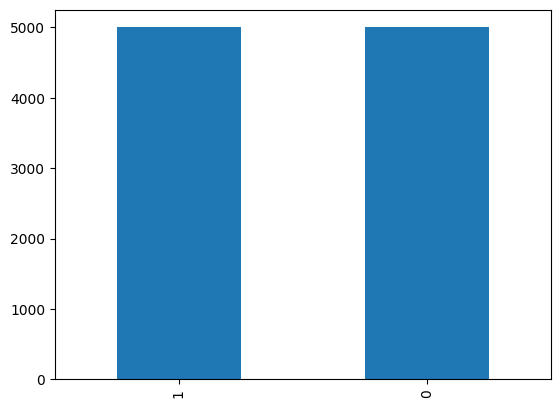

In [ ]:
data['CLASS_LABEL'].value_counts().plot(kind='bar')

##Verificacion de datos nulos en las columnas

In [ ]:
data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


##Imprimir el CLASS_LABEL

In [ ]:
print(data['CLASS_LABEL'].value_counts())

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64


##Separación de x & y de CLASS_LABEL

In [ ]:
X = data.drop('CLASS_LABEL', axis=1).values
Y = data['CLASS_LABEL'].values
print (X.shape , Y.shape)

(10000, 48) (10000,)


##Decision tree

In [ ]:
def experimentar_dt(depths,X, Y):
    """funcion que realiza experimentos de arboles de decision
    depths: list[int] lista con la profundidad de arboles a experimentar
    normalize bool: indica si se aplica normalización a los datos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - profunidad de los arboles
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for depth in depths:
        EficienciaTrain = []
        EficienciaVal = []
        Macc = []
        Mf1 = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]

            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo = DecisionTreeClassifier(max_depth=depth)
            modelo = modelo.fit(Xtrain, Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            Macc.append(accuracy_score(Ytest, Yest))
            #Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'profundidad del arbol'] = depth
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy'] = np.mean(Macc)
        #resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1

    return (resultados)

#Resultados del entrenamiento

In [ ]:
resultados_dt = experimentar_dt([3,10,50,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.942922,0.002025,0.9367,0.017607,0.9367
1,10.0,0.987400,0.000788,0.9549,0.007543,0.9549
2,50.0,1.000000,0.000000,0.9480,0.014471,0.9480
3,100.0,1.000000,0.000000,0.9491,0.013671,0.9491


In [ ]:
remove_n = 3000
drop_indices = np.random.choice(data.index, remove_n, replace=False)
df_subset = data.drop(drop_indices)

X = df_subset.drop('CLASS_LABEL', axis=1).values
Y = df_subset['CLASS_LABEL'].values
print (X.shape , Y.shape)

(7000, 48) (7000,)


In [ ]:
resultados_dt = experimentar_dt([3,10,20,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.943016,0.002393,0.929000,0.029166,0.929000
1,10.0,0.987587,0.000954,0.944000,0.027978,0.944000
2,20.0,0.999730,0.000355,0.938429,0.027334,0.938429
3,100.0,1.000000,0.000000,0.939143,0.029062,0.939143
